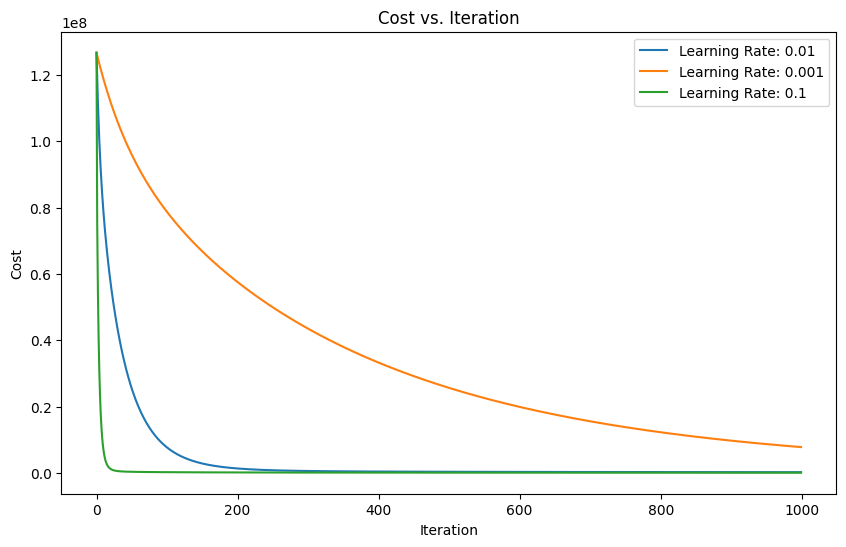

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path='/Users/aadya.mukherjee/Documents/git my/mrm_car_perdiction/CarPrices/CarPrice_Assignment.csv'
data = pd.read_csv(file_path)


# Data Preparation
data = pd.get_dummies(data, drop_first=True)  # One-hot encode categorical variables
# Features and Target Variable
X = data.drop(['price'], axis=1).values  # Features
y = data['price'].values  # Target variable
#print(data)
#print(X)
#print(y)
# Normalize features
data = data.astype(int)
X = X.astype(int)
y = y.astype(int)
#print(type(X))
#print(type(data))
#print(X.dtype)
X = np.nan_to_num(X)
#print(X)
X_mean = X.mean(axis=0)
#print(X_mean)
#X_std = X.std(axis=0)
X_std = np.std(X, axis=0)
#print(X_std)
X_normalized = (X - X_mean) / X_std

# Add a bias column (intercept)
X_b = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Split the dataset into training and testing sets (80-20 split)
split_index = int(0.8 * len(X_b))
X_train, X_test = X_b[:split_index], X_b[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Linear Regression with Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    weights = np.zeros(X.shape[1])
    cost_history = []

    for _ in range(iterations):
        predictions = X @ weights
        errors = predictions - y
        cost = (1 / (2 * m)) * np.dot(errors, errors)
        cost_history.append(cost)
        
        # Update weights
        weights -= (learning_rate / m) * (X.T @ errors)
    
    return weights, cost_history

# Experiment with different learning rates
learning_rates = [0.01, 0.001, 0.1]
iterations = 1000
results = {}

for lr in learning_rates:
    weights, cost_history = gradient_descent(X_train, y_train, learning_rate=lr, iterations=iterations)
    results[lr] = cost_history

# Plotting Cost vs Iteration
plt.figure(figsize=(10, 6))
for lr, cost in results.items():
    plt.plot(cost, label=f'Learning Rate: {lr}')
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

#plotting correlation matrix
#import seaborn as sns
numeric_x = X.select_dtypes(include=['number'])
corr_mat = numeric_x.corr()
plt.heatmap(corr_mat, annot=True)

# Make predictions and evaluate the model
def predict(X, weights):
    return X @ weights

y_pred = predict(X_test, weights)

# Evaluate model performance
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')
def r2_score(y_test, y_pred):
    ss_total=np.sum((y_test -np.mean(y_test))** 2)
    ss_residual=np.sum((y_test - y_pred)** 2)
    return 1-(ss_residual/ss_total)
r2=r2_score(y_test, y_pred)
print("R-Squared (R2) value:", r2)
# Make predictions for new data
# Example new data (replace with actual feature values)

#r_weights=weights[:-1]
#for i in X[0]:
    #new_data = np.array([[(X[i] - X_mean[0]) / X_std[0]]])
    #predicted_price = predict(new_data, r_weights)
    #print(f'Predicted Price: {predicted_price}')
